In [1]:
from astropy.io import fits
from astropy.wcs import WCS
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

In [2]:
rootPath = "/home/daraghhollman/Main/CometsThesis/"

In [3]:
imageV = rootPath + "Comet 2019/images/march09_stacked_V.fits"
imageR = rootPath + "Comet 2019/images/march09_stacked_R.fits"
imageGG495 = rootPath + "Comet 2019/images/march09_stacked_GG495.fits"

In [7]:
from photutils.aperture import CircularAperture, aperture_photometry

from photutils.detection import DAOStarFinder
from astropy.stats import mad_std

In [10]:
def SearchStars(image, fwhm=8., threshold=4, showPlot=False):

    medianAbsoluteDeviation = mad_std(image)
    daofind = DAOStarFinder(fwhm=fwhm, threshold=threshold*medianAbsoluteDeviation)
    sources = daofind(image)

    if (showPlot):
        plt.imshow(image)
        plt.scatter(sources['xcentroid'], sources['ycentroid'], alpha=0.5, color="orange")
        plt.xlabel("Arbitrary X")
        plt.ylabel("Arbitrary Y")
        plt.gca().invert_yaxis()

    return sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,3.638432347434514,3.656548904695586,0.3243651592097076,-0.0776182909978965,0.0038096403703565453,121,0.0,4322.0,43.745896158267584,-4.1023432942864115
2,195.36365645492737,3.613574391682145,0.31385489040320036,0.08466501424560506,-0.008076164989338525,121,0.0,4294.0,44.33629758408052,-4.11689855855312
3,52.49182840261247,27.18873421620305,0.40742184052566943,0.1134757083144447,0.09467761664601233,121,0.0,4446.0,1.5235782747985311,-0.45716192821461665
4,99.10877152886218,99.45390591391158,0.3372008853564044,-0.16373782080374413,0.25250164272371045,121,0.0,5908.0,10.980854258079464,-2.6015903186683023
5,3.620279788607382,195.36167142565708,0.31445892861137087,0.10464785102983029,-7.403155904067344e-05,121,0.0,4288.0,44.102196587125775,-4.111150552009187
6,195.36505430009856,195.3898349813815,0.3309140445469391,-0.08839967692090046,-0.0075740929308978164,121,0.0,4381.0,44.28082404293498,-4.1155392356866285


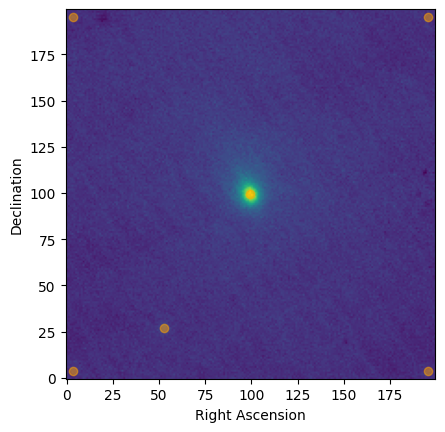

In [11]:
imageDataV = fits.open(imageV)[0].data

SearchStars(imageDataV, showPlot=True)

In [ ]:
apertureRadius = 10
aperture = CircularAperture((0, 0), r=apertureRadius)